<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [7]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [8]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2022-06-12 18:56:57--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2022-06-12 18:56:57--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.03s   

2022-06-12 18:56:57 (12.3 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2022-06-12 18:56:57--
Total wall clock time: 0.4s
Downloaded: 1 files, 418K in 0.03s (12.3 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [9]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des



,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [10]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes


df_clean = df.copy()
df_clean.dropna(subset = ['Height'], inplace = True)
df_clean.dropna(subset = ['Weight'], inplace = True)



In [11]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df_clean.shape

(10000, 3)

In [12]:
df_clean.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
 
df2 = pd.DataFrame()

df2['sexo'] = df['Gender'].apply( lambda x: 'masculino' if x== 'Male' else 'femenino')
df2['peso'] = df['Weight'] * 0.4536
df2['altura'] = df['Height'] * 2.54 /100
df2.head()


,sexo,peso,altura
0,masculino,109.722920,1.875714
1,masculino,73.624030,1.747060
2,masculino,96.499252,1.882397
3,masculino,99.811265,1.821967
4,masculino,93.600270,1.774998


In [14]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

df2.shape[0]


10000

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

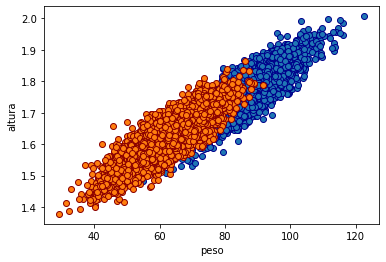

In [15]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df2[df2['sexo'] == 'masculino']['peso'], df2[df2['sexo'] == 'masculino']['altura'], edgecolors = 'darkBlue', label = 'masculino')
ax.scatter(df2[df2['sexo'] == 'femenino']['peso'], df2[df2['sexo'] == 'femenino']['altura'], edgecolors='darkRed', label= 'femenino')
ax.set_xlabel('peso')
ax.set_ylabel('altura')
plt.show()


valor medio altura: 1.7532691860179221


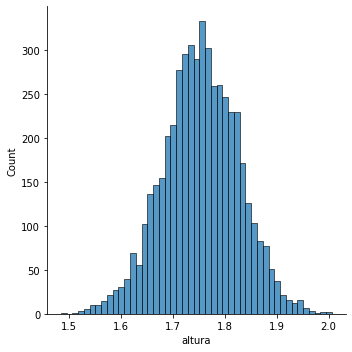

In [16]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

print('valor medio altura:', df2[df2['sexo'] == 'masculino']['altura'].mean())
sns.displot(df2[df2['sexo'] == 'masculino']['altura'])
plt.show()

valor medio mujeres 1.6182028495269971


<function matplotlib.pyplot.show>

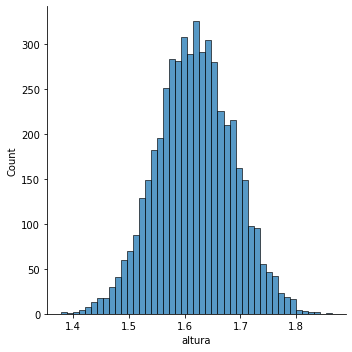

In [17]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio

print('valor medio mujeres', df2[df2['sexo'] == 'femenino']['altura'].mean())
sns.displot(df2[df2['sexo'] == 'femenino']['altura'])
plt.show




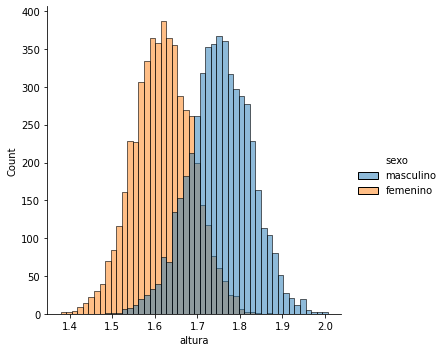

In [18]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"

sns.displot(data=df2, x="altura", hue="sexo")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [20]:
df_mujer = df2[ df2['sexo']== 'femenino']
X_femenino = df_mujer[['peso']].values
y_femenino = df_mujer['altura'].values

df_hombre = df2[ df2['sexo'] == 'masculino']
X_masculino = df_hombre[['peso']].values
y_masculino = df_hombre['altura'].values



In [21]:
from sklearn.model_selection import train_test_split

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_femenino, y_femenino, test_size=0.3, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_masculino, y_masculino, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
lr_f = LinearRegression()
lr_f.fit(X_train_f, y_train_f)
y_hat_f = lr_f.predict(X_test_f)

lr_m = LinearRegression()
lr_m.fit(X_train_m, y_train_m)
y_hat_m = lr_m.predict(X_test_m)



# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [23]:
from sklearn.metrics import r2_score
score_f = r2_score(y_test_f, y_hat_f)
print(f"Coeficiente de determinación para el dataset femenino: {score_f:.2f}")

from sklearn.metrics import r2_score
score_m = r2_score(y_test_m, y_hat_m)
print(f"Coeficiente de determinación para el dataset masculino: {score_m:.2f}")



Coeficiente de determinación para el dataset femenino: 0.73
Coeficiente de determinación para el dataset masculino: 0.75


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

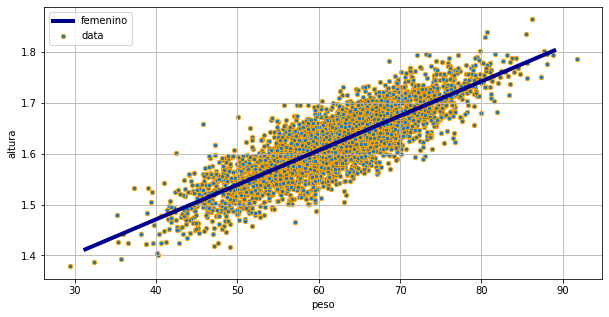

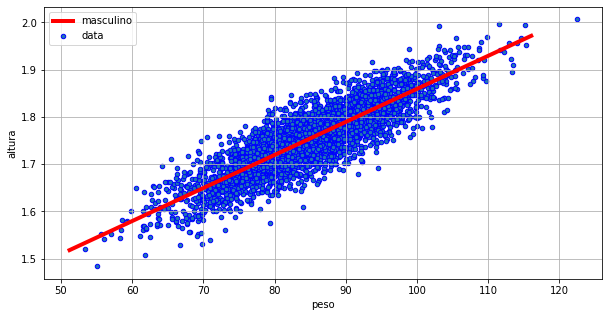

In [25]:
lx = sorted(X_test_f)
ly = lr_f.predict(lx)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(lx, ly, label="femenino", color='darkblue', lw=4)
ax.scatter(X_train_f, y_train_f, edgecolor='orange', s=20, label="data")
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
ax.grid('dashed')
plt.show()

lx = sorted(X_test_m)
ly = lr_m.predict(lx)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()

ax.plot(lx, ly, label="masculino", color='red', lw=4)
ax.scatter(X_train_m, y_train_m, edgecolor='b', s=20, label="data")
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
ax.grid('dashed')
plt.show()

